In [1]:
import pandas as pd
import numpy as np 
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from statsmodels.tools.sm_exceptions import ValueWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.simplefilter('ignore', ValueWarning)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from datetime import date, timedelta
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima
from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import residuals_plot

In [2]:
countries = ['India', 'USA', 'United Kingdom', 'Russia', 'Israel']

In [3]:

countries1 = ['India', 'USA', 'United Kingdom', 'Russia']

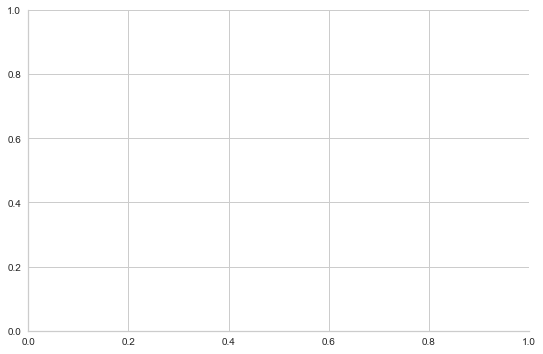

In [4]:
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB91_Violet]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

In [5]:
sns.set(font='Franklin Gothic Book',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})

In [6]:

csv_data = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
df = pd.read_csv(csv_data, usecols= ["location", "date", "new_cases", "new_tests", "new_deaths", 'new_vaccinations'])
df['date'] = pd.to_datetime(df.date)
df.dropna(inplace=True)
df.head()
df.isna()

,location,date,new_cases,new_deaths,new_tests,new_vaccinations
1292,False,False,False,False,False,False
1293,False,False,False,False,False,False
1294,False,False,False,False,False,False
1295,False,False,False,False,False,False
1296,False,False,False,False,False,False
...,...,...,...,...,...,...
96200,False,False,False,False,False,False
96201,False,False,False,False,False,False
96202,False,False,False,False,False,False
96203,False,False,False,False,False,False


In [7]:
data_ind = df[df["location"] == "India"] #India
data_ind_features = data_ind.drop(['location', 'date', 'new_cases'], axis = 1)
data_ind_target = data_ind['new_cases'].copy()

data_usa = df[df['location'] == 'United States'] #United States
data_usa_features = data_usa.drop(['location', 'date', 'new_cases'], axis = 1)
data_usa_target = data_usa['new_cases'].copy()

data_uk = df[df['location'] == 'United Kingdom'] #United Kingdom
data_uk_features = data_uk.drop(['location', 'date', 'new_cases'], axis = 1)
data_uk_target = data_uk['new_cases'].copy()

data_russia = df[df['location'] == 'Russia'] #Russia
data_russia_features = data_russia.drop(['location', 'date', 'new_cases'], axis = 1)
data_russia_target = data_russia['new_cases'].copy()

data_israel = df[df['location'] == 'Israel'] #Israel
data_israel_features = data_israel.drop(['location', 'date', 'new_cases'], axis = 1)
data_israel_target = data_israel['new_cases'].copy()

In [8]:
scaler = StandardScaler()
data_ind_features_sc = scaler.fit_transform(data_ind_features)
data_usa_features_sc = scaler.fit_transform(data_usa_features)
data_uk_features_sc = scaler.fit_transform(data_uk_features)
data_russia_features_sc = scaler.fit_transform(data_russia_features)
data_israel_features_sc = scaler.fit_transform(data_israel_features)

In [9]:
train_india_x, test_india_x, train_india_y, test_india_y  = train_test_split(data_ind_features_sc, data_ind_target, test_size = 0.2)
train_usa_x, test_usa_x , train_usa_y, test_usa_y = train_test_split(data_usa_features_sc, data_usa_target, test_size = 0.2)
train_uk_x, test_uk_x, train_uk_y, test_uk_y = train_test_split(data_uk_features_sc, data_uk_target, test_size = 0.2)
train_russia_x, test_russia_x, train_russia_y, test_russia_y = train_test_split(data_russia_features_sc, data_russia_target, test_size = 0.2)
train_israel_x, test_israel_x, train_israel_y, test_israel_y = train_test_split(data_israel_features_sc, data_israel_target, test_size = 0.2)

In [10]:
india_lreg = LinearRegression()
usa_lreg = LinearRegression()
russia_lreg = LinearRegression()
uk_lreg = LinearRegression()
israel_lreg = LinearRegression()

In [11]:
india_lreg.fit(train_india_x, train_india_y)
usa_lreg.fit(train_usa_x, train_usa_y)
russia_lreg.fit(train_russia_x, train_russia_y)
uk_lreg.fit(train_uk_x, train_uk_y)
israel_lreg.fit(train_israel_x, train_israel_y)

LinearRegression()

In [12]:
def calcRMSE(model,x,y):
    predictions = model.predict(x)
    rmse = np.sqrt(mean_squared_error(y,predictions))
    return rmse

In [13]:
rmse_for_lreg =list()

india_lreg_rmse = calcRMSE(india_lreg, test_india_x, test_india_y)
usa_lreg_rmse = calcRMSE(usa_lreg, test_usa_x, test_usa_y)
russia_lreg_rmse = calcRMSE(russia_lreg, test_russia_x, test_russia_y)
uk_lreg_rmse = calcRMSE(uk_lreg, test_uk_x, test_uk_y)
israel_lreg_rmse = calcRMSE(israel_lreg, test_israel_x, test_israel_y)

rmse_for_lreg.extend([india_lreg_rmse, usa_lreg_rmse, uk_lreg_rmse, russia_lreg_rmse, israel_lreg_rmse])

print(rmse_for_lreg)

[90424.72380262599, 31229.92139547294, 6888.157523105034, 1649.2759502960669, 1616.2720438206345]


In [14]:
india_rfr = RandomForestRegressor()
usa_rfr = RandomForestRegressor()
uk_rfr = RandomForestRegressor()
russia_rfr = RandomForestRegressor()
israel_rfr = RandomForestRegressor()

In [15]:

india_rfr.fit(train_india_x, train_india_y)
usa_rfr.fit(train_usa_x, train_usa_y)
uk_rfr.fit(train_uk_x, train_uk_y)
russia_rfr.fit(train_russia_x, train_russia_y)
israel_rfr.fit(train_israel_x, train_israel_y)

RandomForestRegressor()

In [16]:
rmse_for_rfr = list()
rmse_for_rfr1 = list()

india_rfr_rmse = calcRMSE(india_rfr, test_india_x, test_india_y)
usa_rfr_rmse = calcRMSE(usa_rfr, test_usa_x, test_usa_y)
uk_rfr_rmse = calcRMSE(uk_rfr, test_uk_x, test_uk_y)
russia_rfr_rmse = calcRMSE(russia_rfr, test_russia_x, test_russia_y)
israel_rfr_rmse = calcRMSE(israel_rfr, test_israel_x, test_israel_y)

rmse_for_rfr.extend([india_rfr_rmse, usa_rfr_rmse, uk_rfr_rmse, russia_rfr_rmse, israel_rfr_rmse])
rmse_for_rfr1.extend([india_rfr_rmse, usa_rfr_rmse, uk_rfr_rmse, russia_rfr_rmse])
print(rmse_for_rfr)
print(rmse_for_rfr1)

[40972.67299659354, 21805.732298052728, 4246.258779099626, 1661.973834162259, 1892.9817021963]
[40972.67299659354, 21805.732298052728, 4246.258779099626, 1661.973834162259]


In [17]:
pred_india_lreg = india_lreg.predict(data_ind_features_sc)
pred_usa_lreg = usa_lreg.predict(data_usa_features_sc)
pred_uk_lreg = uk_lreg.predict(data_uk_features_sc)
pred_russia_lreg = russia_lreg.predict(data_russia_features_sc)
pred_israel_lreg = israel_lreg.predict(data_israel_features_sc)

In [18]:
pred_india_rfr = india_rfr.predict(data_ind_features_sc)
pred_usa_rfr = usa_rfr.predict(data_usa_features_sc)
pred_uk_rfr = uk_rfr.predict(data_uk_features_sc)
pred_russia_rfr = russia_rfr.predict(data_russia_features_sc)
pred_israel_rfr = israel_rfr.predict(data_israel_features_sc)

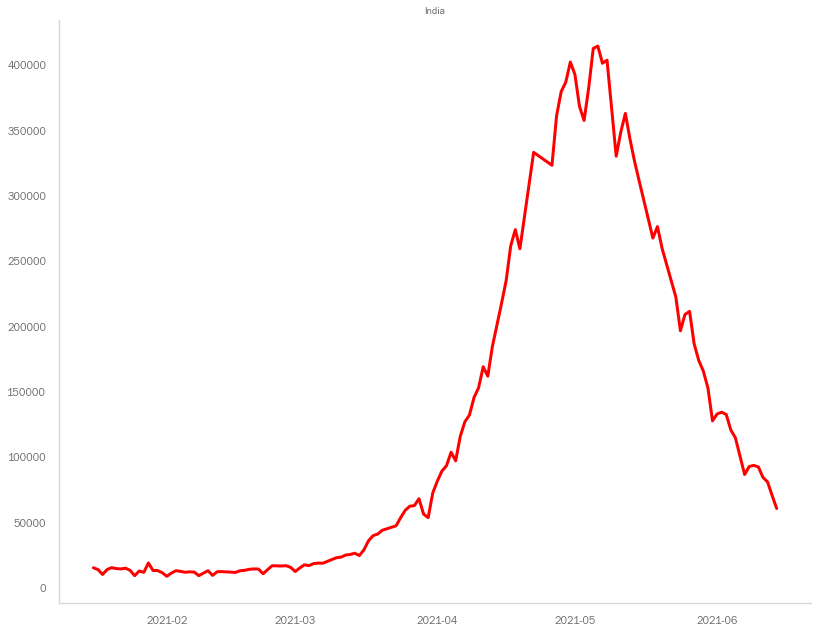

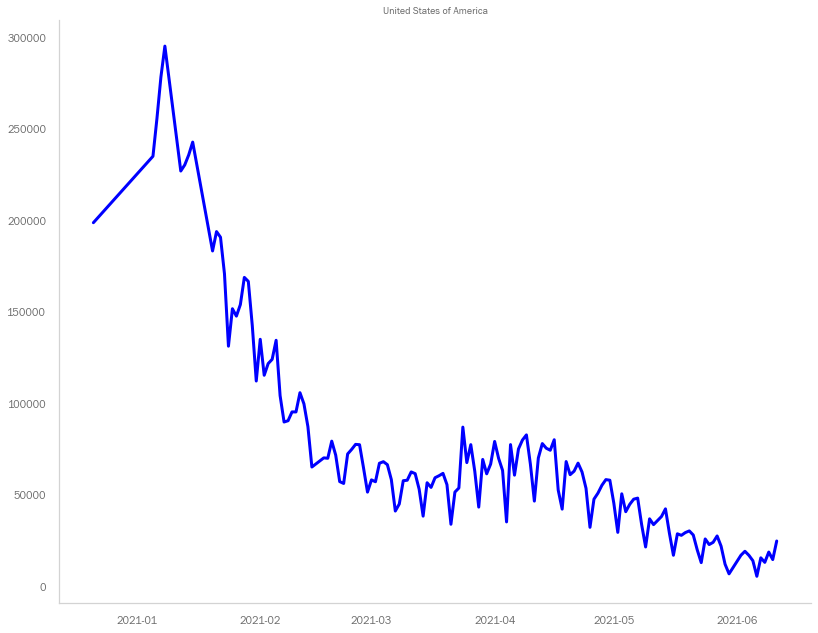

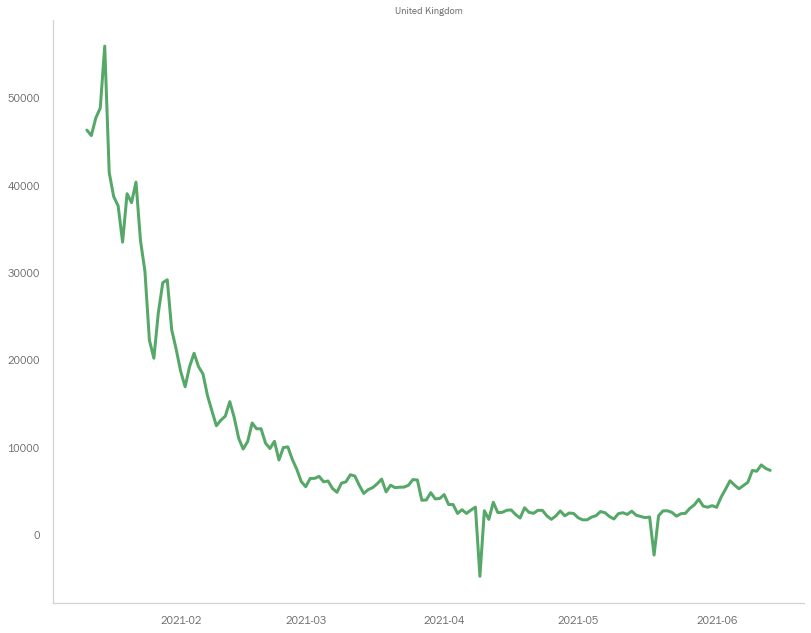

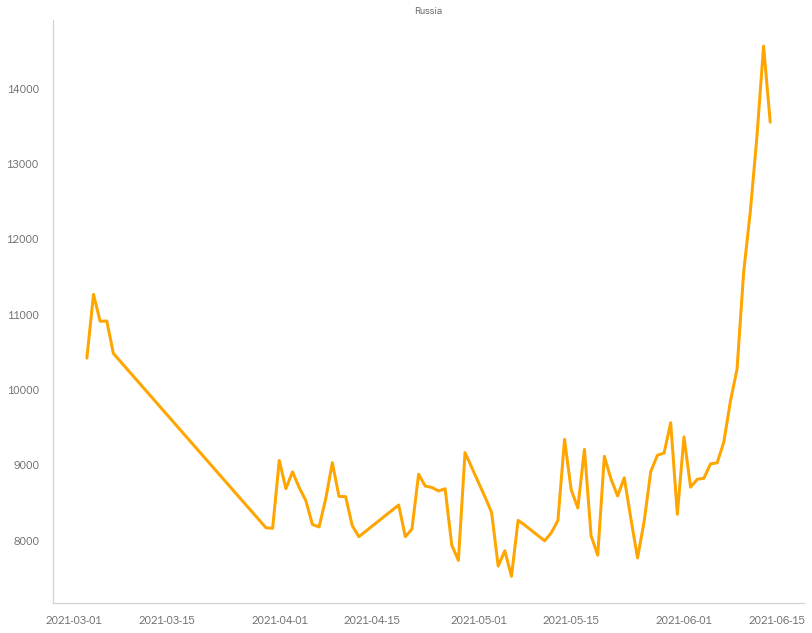

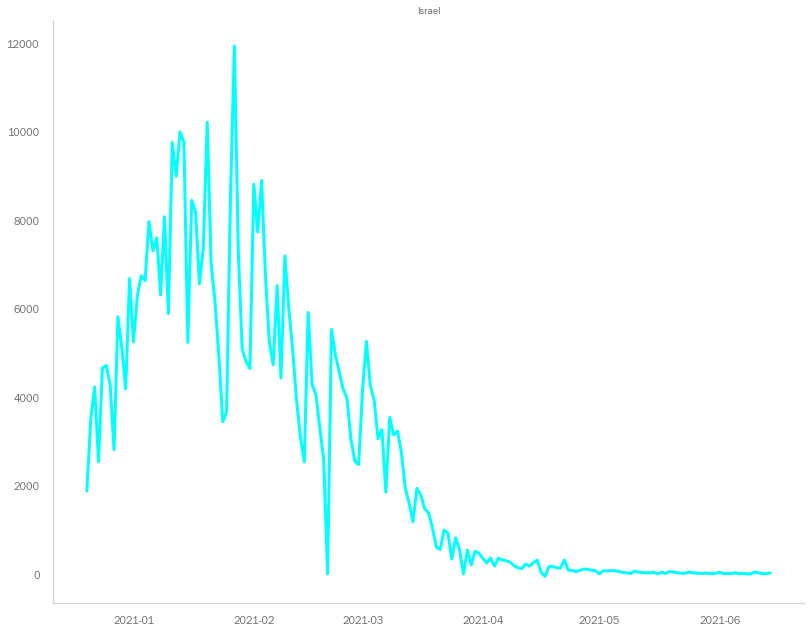

In [19]:
fig=plt.figure(figsize=(12,10))
fig, plt.plot(data_ind['date'],data_ind['new_cases'],color = 'red', linewidth = 3)
fig, plt.title('India', size = 10)
plt.show()
fig.savefig('E:/webapp/india_graph/india_graph.png', bbox_inches = "tight")

fig1=plt.figure(figsize=(12,10))
plt.plot(data_usa['date'], data_usa['new_cases'], color = 'blue', linewidth = 3)
plt.title('United States of America', size = 10)
plt.show()
fig1.savefig('E:/webapp/usa_graph/usa_graph.png', bbox_inches = "tight")

fig2=plt.figure(figsize=(12,10))
plt.plot(data_uk['date'], data_uk['new_cases'], color = 'g' , linewidth = 3)
plt.title('United Kingdom', size = 10)
plt.show()
fig2.savefig('E:/webapp/uk_graph/uk_graph.png', bbox_inches = "tight")

fig3=plt.figure(figsize=(12,10))
plt.plot(data_russia['date'], data_russia['new_cases'], color ='orange', linewidth = 3)
plt.title('Russia', size = 10)
plt.show()
fig3.savefig('E:/webapp/russia_graph/russia_graph.png', bbox_inches = "tight")

fig4=plt.figure(figsize=(12,10))
plt.plot(data_israel['date'], data_israel['new_cases'], color = 'cyan', linewidth = 3)
plt.title('Israel', size = 10)
plt.show()
fig4.savefig('E:/webapp/iran_graph/iran_graph.png', bbox_inches = "tight")

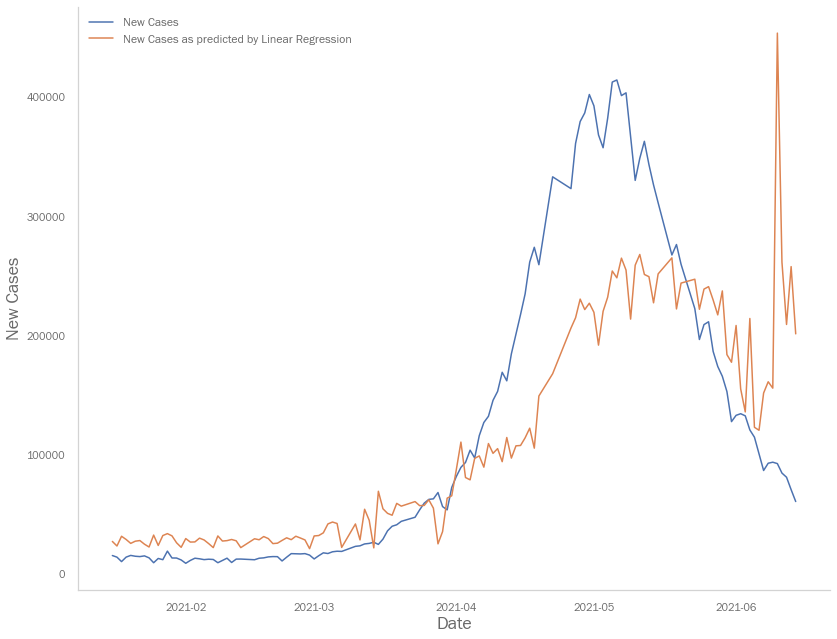

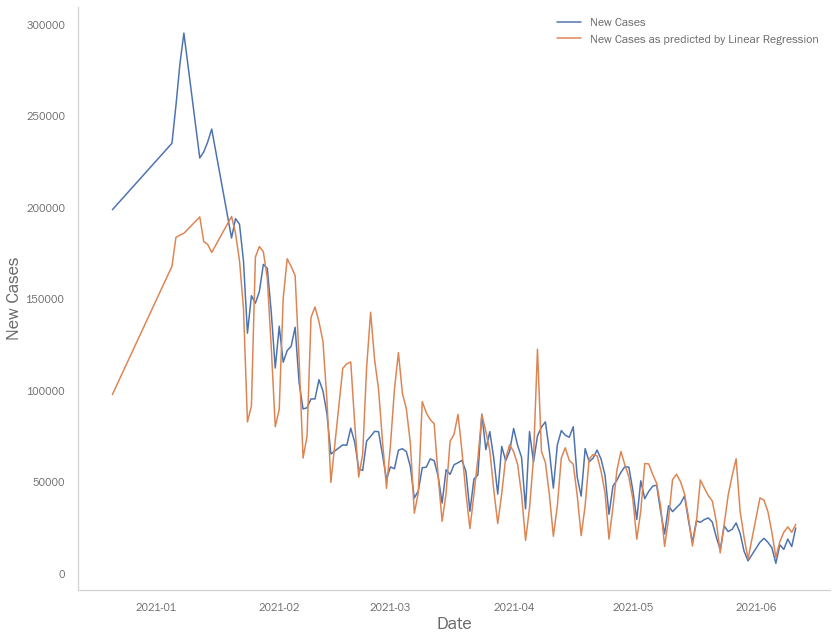

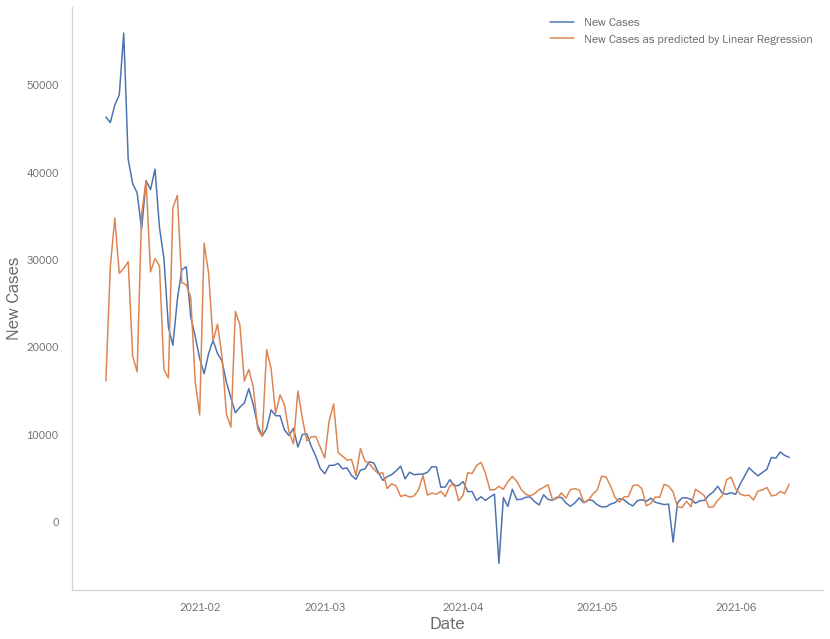

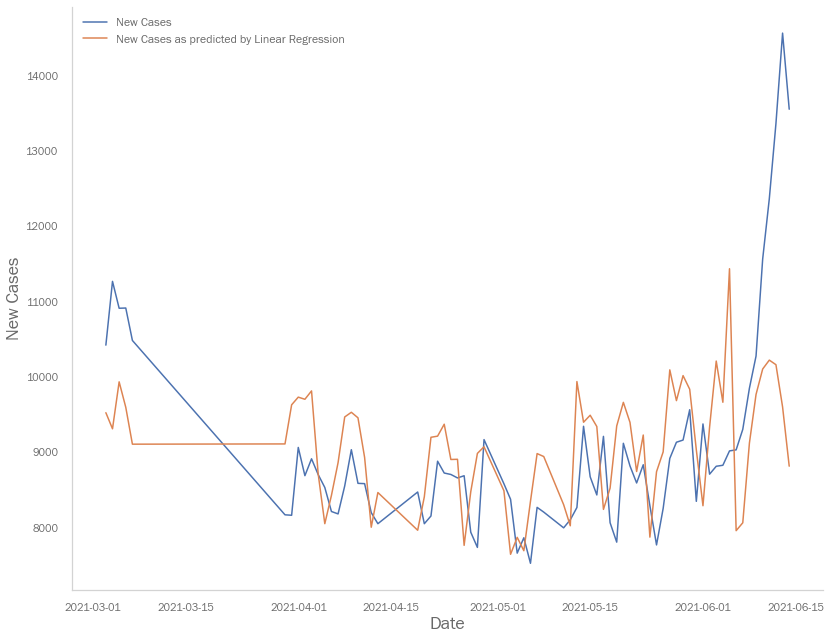

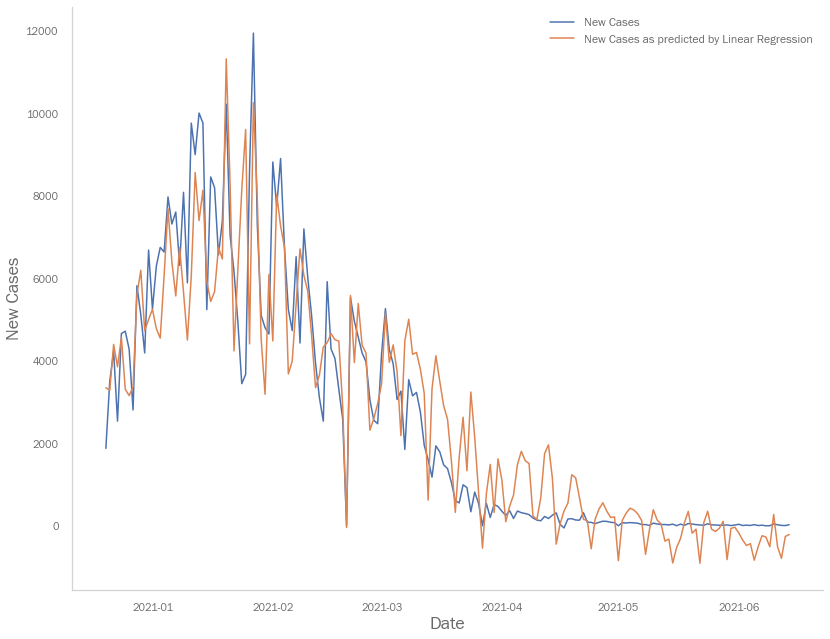

In [20]:
fig=plt.figure(figsize=(12,10))
plt.plot(data_ind['date'],data_ind['new_cases'])
plt.plot(data_ind['date'],pred_india_lreg)
plt.legend(['New Cases','New Cases as predicted by Linear Regression'], prop={'size': 12})
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()
fig.savefig("E:/webapp/india_lr_pred/india_lr_pred.png", bbox_inches = "tight")

fig1=plt.figure(figsize=(12,10))
plt.plot(data_usa['date'],data_usa['new_cases'])
plt.plot(data_usa['date'],pred_usa_lreg)
plt.legend(['New Cases','New Cases as predicted by Linear Regression'], prop={'size': 12})
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()
fig1.savefig("E:/webapp/usa_lr_pred/usa_lr_pred.png", bbox_inches = "tight")

fig2=plt.figure(figsize=(12,10))
plt.plot(data_uk['date'],data_uk['new_cases'])
plt.plot(data_uk['date'],pred_uk_lreg)
plt.legend(['New Cases','New Cases as predicted by Linear Regression'], prop={'size': 12})
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()
fig2.savefig("E:/webapp/uk_lr_pred/uk_lr_pred.png", bbox_inches = "tight")

fig3=plt.figure(figsize=(12,10))
plt.plot(data_russia['date'],data_russia['new_cases'])
plt.plot(data_russia['date'],pred_russia_lreg)
plt.legend(['New Cases','New Cases as predicted by Linear Regression'], prop={'size': 12})
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()
fig3.savefig("E:/webapp/russia_lr_pred/russia_lr_pred.png", bbox_inches = "tight")

fig4=plt.figure(figsize=(12,10))
plt.plot(data_israel['date'],data_israel['new_cases'])
plt.plot(data_israel['date'],pred_israel_lreg)
plt.legend(['New Cases','New Cases as predicted by Linear Regression'], prop={'size': 12})
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()
fig4.savefig("E:/webapp/iran_lr_pred/iran_lr_pred.png", bbox_inches = "tight")

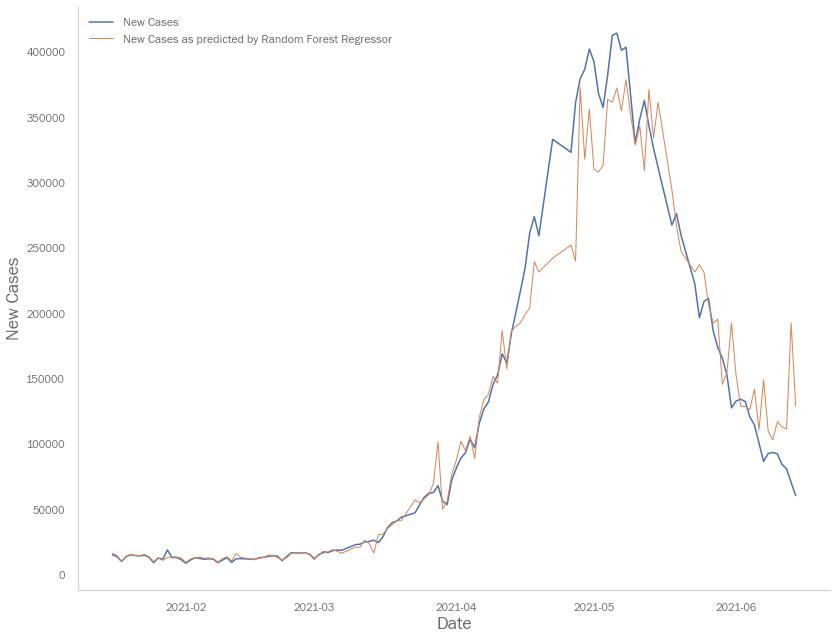

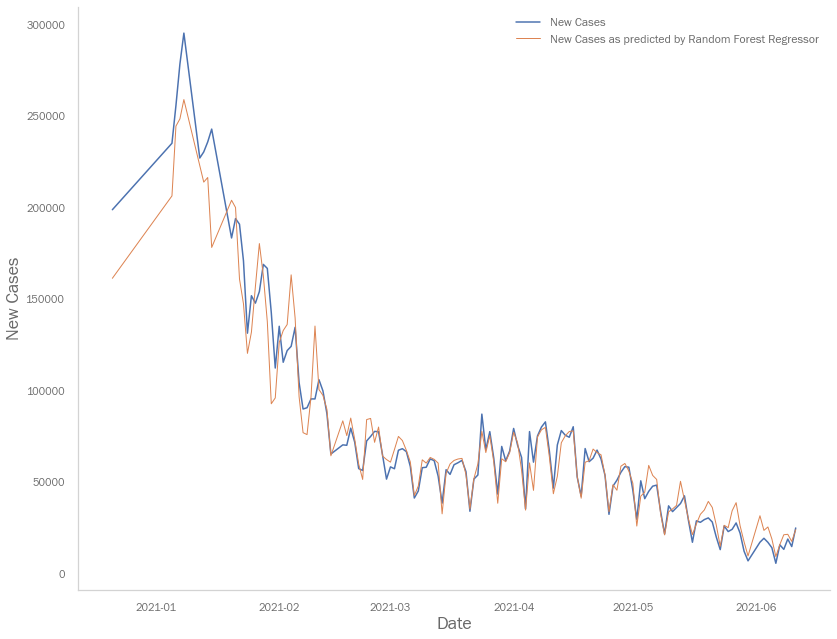

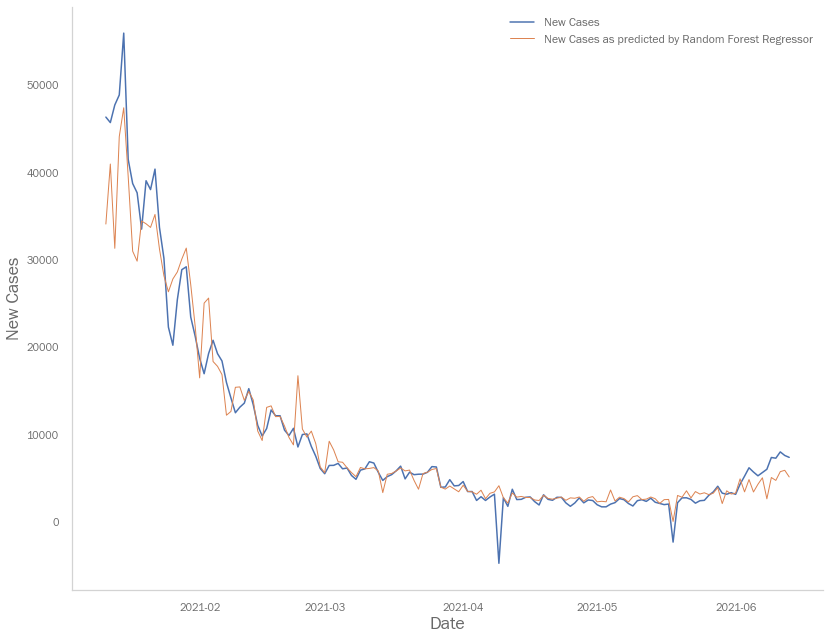

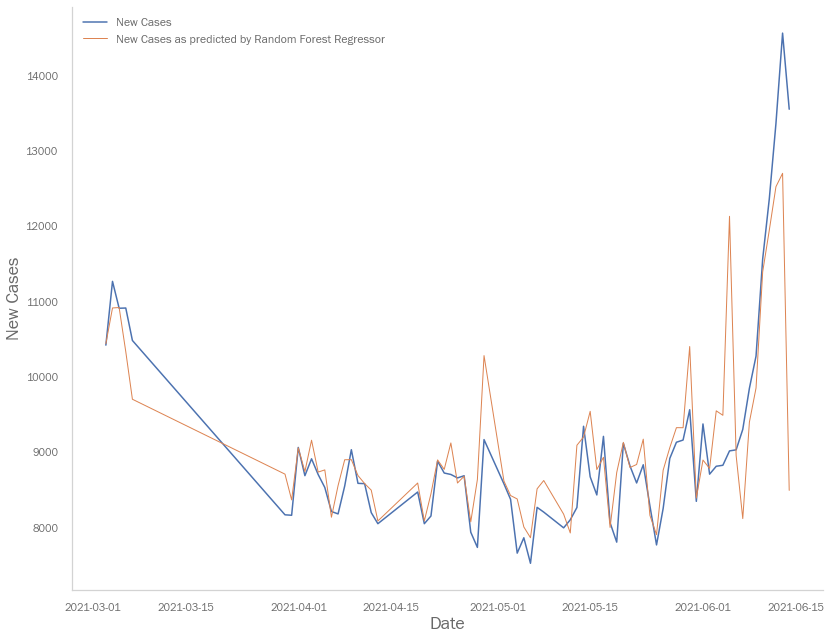

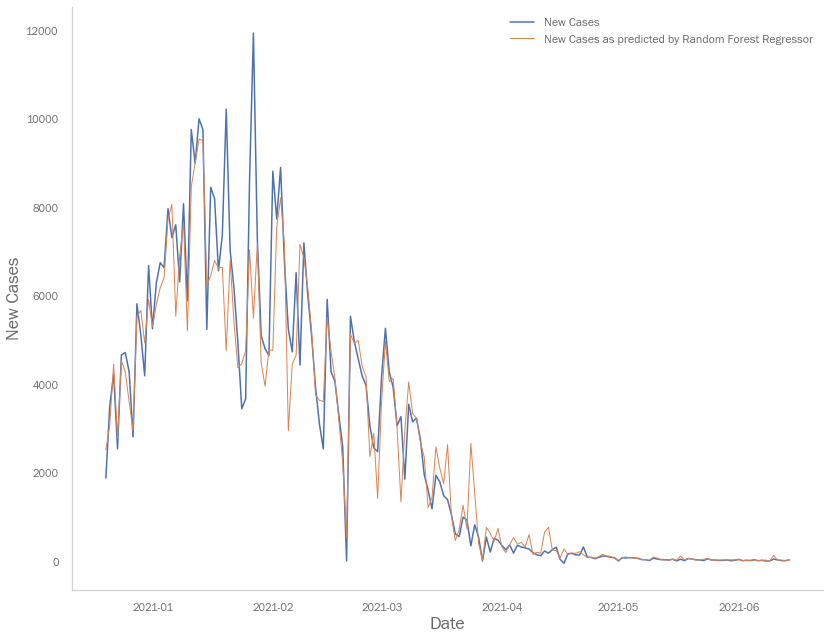

In [21]:
fig=plt.figure(figsize=(12,10))
plt.plot(data_ind['date'],data_ind['new_cases'])
plt.plot(data_ind['date'],pred_india_rfr, linewidth= 1)
plt.legend(['New Cases','New Cases as predicted by Random Forest Regressor'], prop={'size': 12})
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()
fig.savefig("E:/webapp/india_rfr_pred/india_rfr_pred.png", bbox_inches = "tight")

fig1=plt.figure(figsize=(12,10))
plt.plot(data_usa['date'],data_usa['new_cases'])
plt.plot(data_usa['date'],pred_usa_rfr, linewidth= 1)
plt.legend(['New Cases','New Cases as predicted by Random Forest Regressor'], prop={'size': 12})
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()
fig1.savefig("E:/webapp/usa_rfr_pred/usa_rfr_pred.png", bbox_inches = "tight")

fig2=plt.figure(figsize=(12,10))
plt.plot(data_uk['date'],data_uk['new_cases'])
plt.plot(data_uk['date'],pred_uk_rfr,linewidth= 1)
plt.legend(['New Cases','New Cases as predicted by Random Forest Regressor'], prop={'size': 12})
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()
fig2.savefig("E:/webapp/uk_rfr_pred/uk_rfr_pred.png", bbox_inches = "tight")

fig3=plt.figure(figsize=(12,10))
plt.plot(data_russia['date'],data_russia['new_cases'])
plt.plot(data_russia['date'],pred_russia_rfr, linewidth= 1)
plt.legend(['New Cases','New Cases as predicted by Random Forest Regressor'], prop={'size': 12})
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()
fig3.savefig("E:/webapp/russia_rfr_pred/russia_rfr_pred.png", bbox_inches = "tight")

fig4=plt.figure(figsize=(12,10))
plt.plot(data_israel['date'],data_israel['new_cases'])
plt.plot(data_israel['date'],pred_israel_rfr, linewidth= 1)
plt.legend(['New Cases','New Cases as predicted by Random Forest Regressor'], prop={'size': 12})
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()
fig4.savefig("E:/webapp/iran_rfr_pred/iran_rfr_pred.png", bbox_inches = "tight")

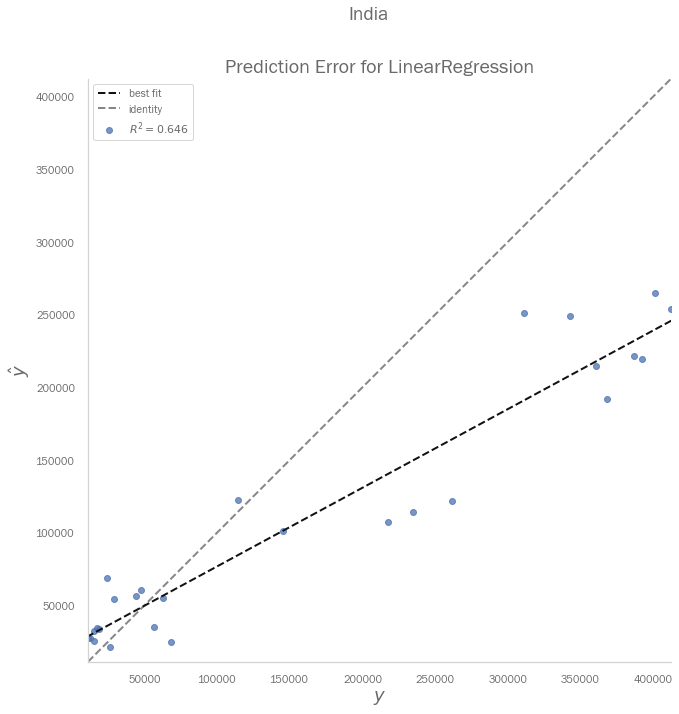

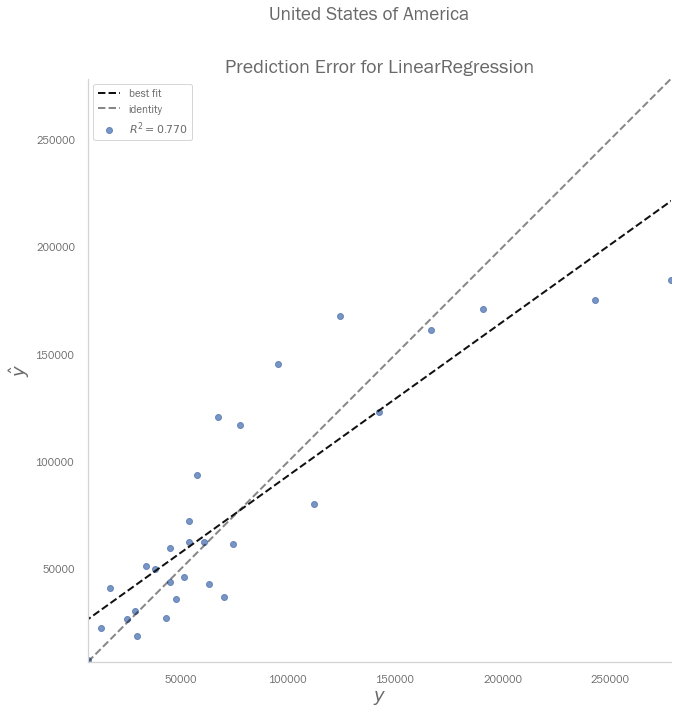

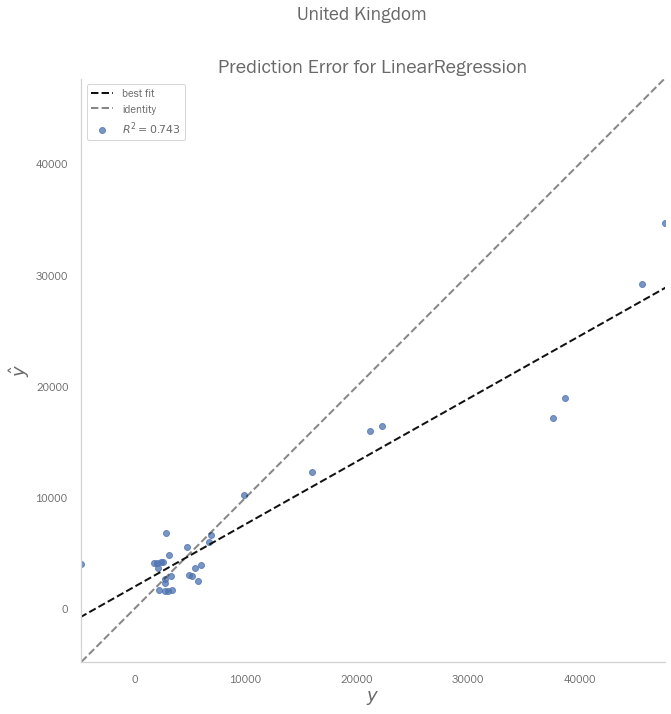

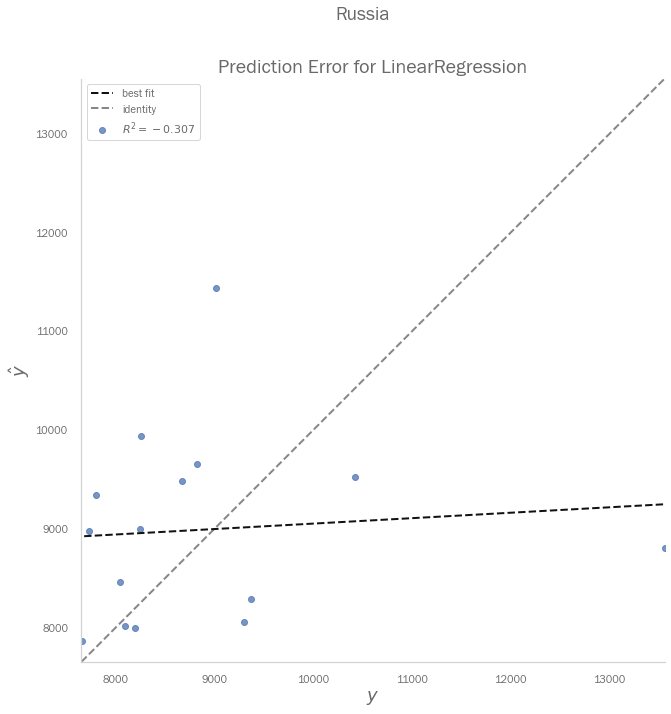

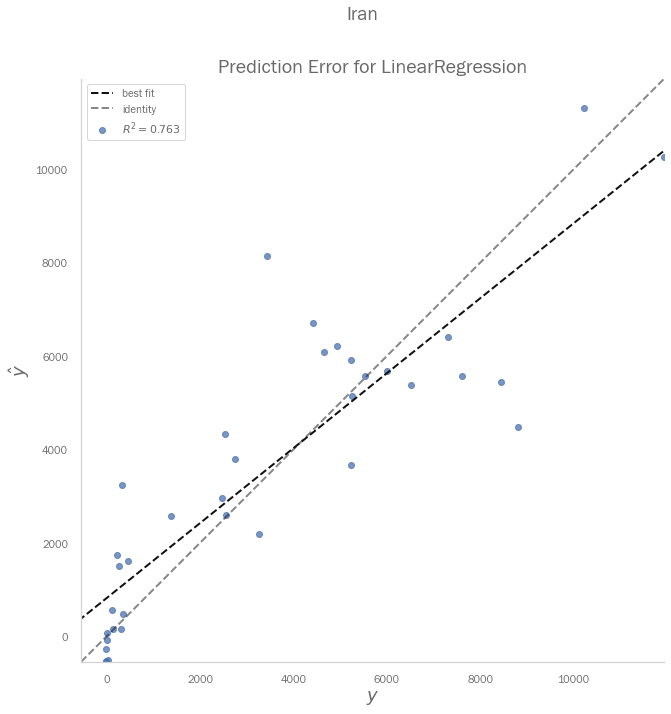

In [22]:
f = plt.figure(figsize =(10,10))
f.suptitle("India")
viz_india_lreg = prediction_error(india_lreg, train_india_x, train_india_y, test_india_x, test_india_y, )


f1 = plt.figure(figsize =(10,10))
f1.suptitle("United States of America")
viz_usa_lreg = prediction_error(usa_lreg, train_usa_x, train_usa_y, test_usa_x, test_usa_y)

f2 = plt.figure(figsize =(10,10))
f2.suptitle("United Kingdom")
viz_uk_lreg = prediction_error(uk_lreg, train_uk_x, train_uk_y, test_uk_x, test_uk_y)

f3 = plt.figure(figsize =(10,10))
f3.suptitle("Russia")
viz_russia_lreg = prediction_error(russia_lreg, train_russia_x, train_russia_y, test_russia_x, test_russia_y)

f4 = plt.figure(figsize =(10,10))
f4.suptitle("Iran")
viz_israel_lreg = prediction_error(israel_lreg, train_israel_x, train_israel_y, test_israel_x, test_israel_y)

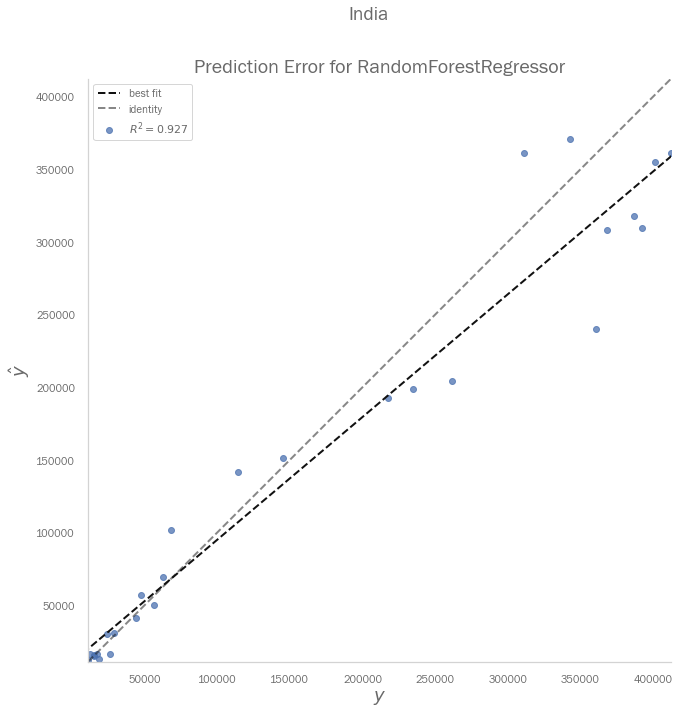

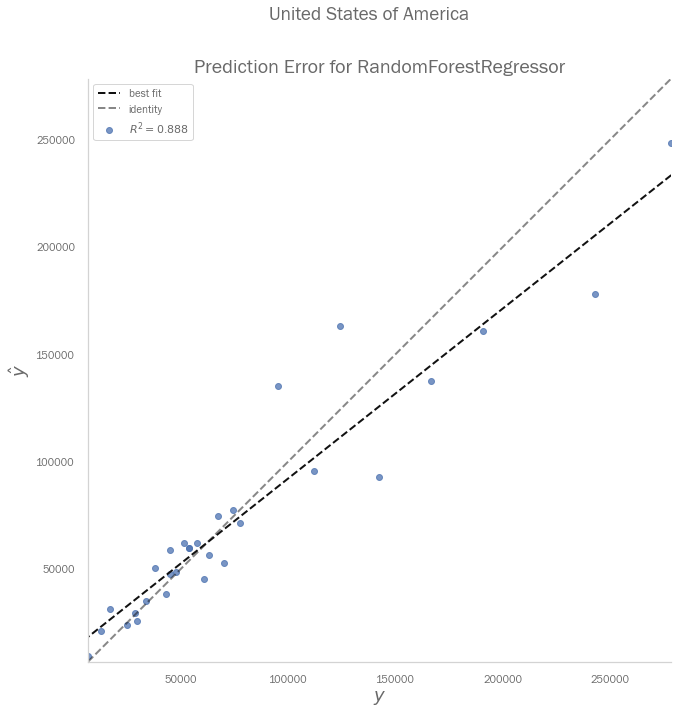

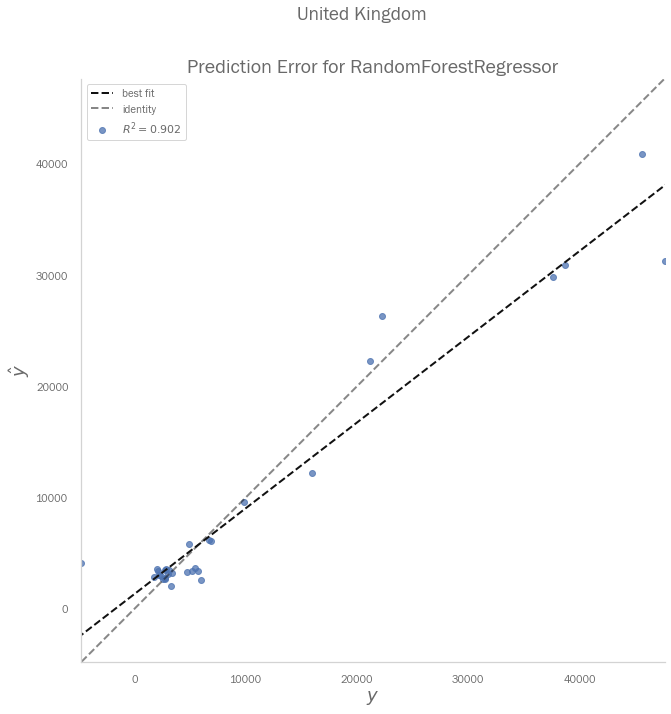

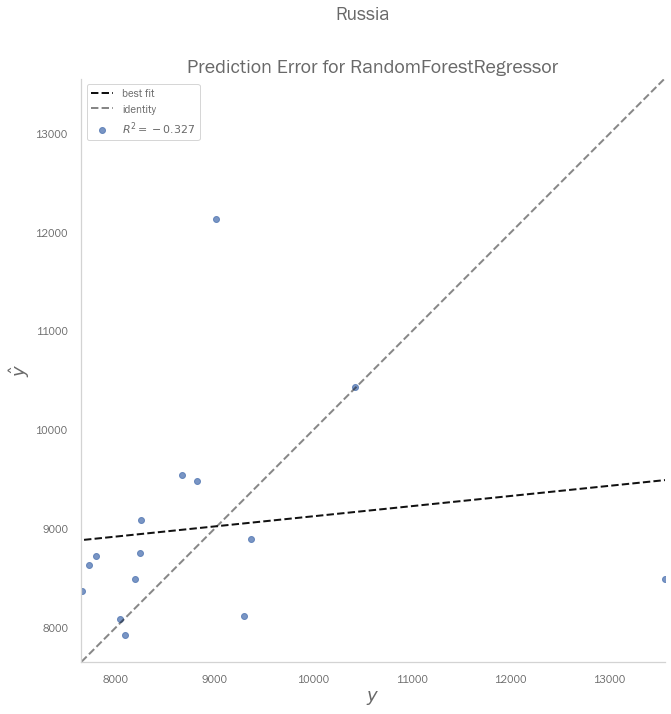

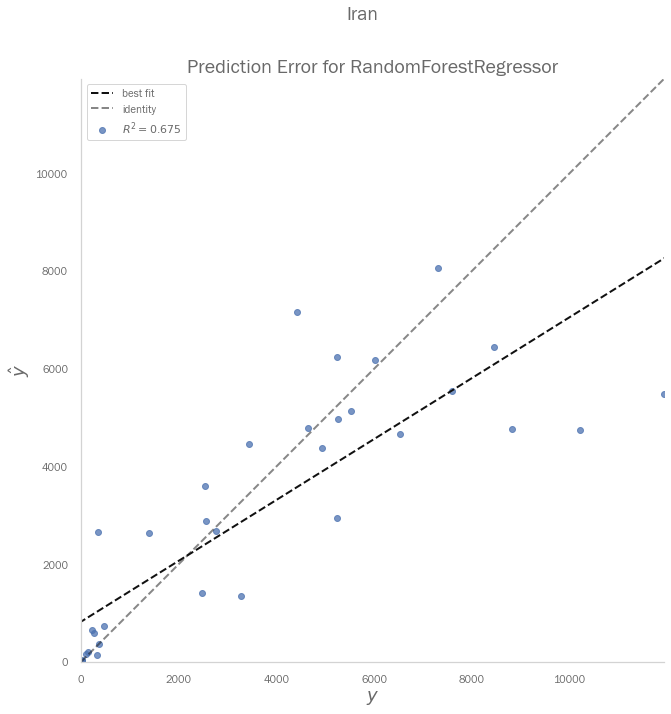

In [23]:
f_forest = plt.figure(figsize =(10,10))
f_forest.suptitle("India")
viz_india_rfr = prediction_error(india_rfr, train_india_x, train_india_y, test_india_x, test_india_y)

f1_forest = plt.figure(figsize=(10,10))
f1_forest.suptitle("United States of America")
viz_usa_rfr = prediction_error(usa_rfr, train_usa_x, train_usa_y, test_usa_x, test_usa_y)

f2_forest = plt.figure(figsize=(10,10))
f2_forest.suptitle("United Kingdom")
viz_uk_rfr = prediction_error(uk_rfr, train_uk_x, train_uk_y, test_uk_x, test_uk_y)

f3_forest = plt.figure(figsize = (10,10))
f3_forest.suptitle("Russia")
viz_russia_rfr = prediction_error(russia_rfr, train_russia_x, train_russia_y, test_russia_x, test_russia_y)

f4_forest = plt.figure(figsize = (10,10))
f4_forest.suptitle("Iran")
viz_israel_rfr = prediction_error(israel_rfr, train_israel_x, train_israel_y, test_israel_x, test_israel_y)

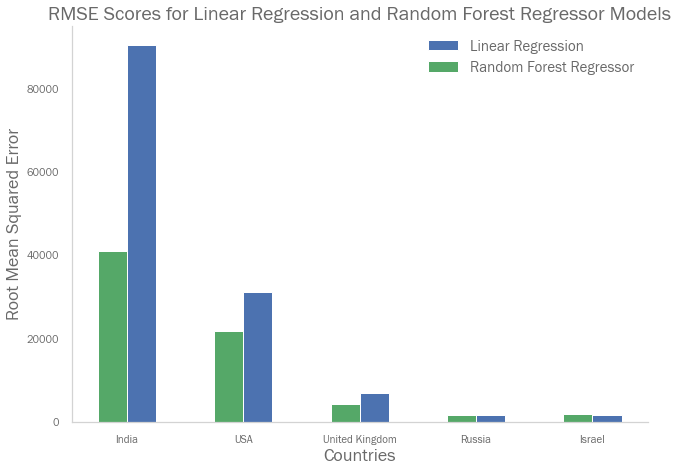

In [24]:
#ADD YTICK
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(countries , rmse_for_lreg, color = 'b', width = 0.25, align='edge' )

ax.bar(countries , rmse_for_rfr, color = 'g', width = -0.25, align='edge')
plt.legend(['Linear Regression','Random Forest Regressor'], prop={'size': 15})
plt.xlabel('Countries')
plt.ylabel('Root Mean Squared Error')
plt.title("RMSE Scores for Linear Regression and Random Forest Regressor Models")
fig.savefig('E:/webapp/rmse_for_lreg/rmse_for_lreg.png', bbox_inches = "tight")

In [25]:
csv_data = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
dataframe = pd.read_csv(csv_data, usecols= ["location", "date", "new_cases"])
dataframe['date'] = pd.to_datetime(dataframe.date)
dataframe.dropna(inplace=True)
dataframe.tail()

,location,date,new_cases
96203,Zimbabwe,2021-06-12,164.0
96204,Zimbabwe,2021-06-13,107.0
96205,Zimbabwe,2021-06-14,118.0
96206,Zimbabwe,2021-06-15,241.0
96207,Zimbabwe,2021-06-16,238.0


In [26]:
data_ind_arima = dataframe[dataframe['location'] == 'India']
data_usa_arima = dataframe[dataframe['location'] == 'United States']
data_uk_arima = dataframe[dataframe['location'] == 'United Kingdom']
data_russia_arima = dataframe[dataframe['location'] == 'Russia']
data_israel_arima = dataframe[dataframe['location'] == 'Israel']

In [27]:
training_data_india = data_ind_arima[:-7]

training_data_usa = data_usa_arima[:-7]
training_data_uk = data_uk_arima[:-7]
training_data_russia = data_russia_arima[:-7]
training_data_israel = data_israel_arima[:-7]
training_data_india.tail()

,location,date,new_cases
40276,India,2021-06-05,114460.0
40277,India,2021-06-06,100636.0
40278,India,2021-06-07,86498.0
40279,India,2021-06-08,92596.0
40280,India,2021-06-09,93463.0


In [28]:
india_arima = ARIMA(training_data_india['new_cases'], order = (5,2,5))
india_arima_fit = india_arima.fit()

In [29]:
usa_arima = ARIMA(training_data_usa['new_cases'], order = (5,1,4))
usa_arima_fit = usa_arima.fit()

In [30]:
uk_arima = ARIMA(training_data_uk['new_cases'], order = (5,2,3))
uk_arima_fit = uk_arima.fit()

C:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [31]:
russia_arima = ARIMA(training_data_russia['new_cases'], order = (5,2,5))
russia_arima_fit = russia_arima.fit()

In [32]:
israel_arima = ARIMA(training_data_israel['new_cases'], order = (5,2,2))
israel_arima_fit = israel_arima.fit()

C:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [33]:
india_forecasts = india_arima_fit.forecast(steps = 8)

usa_forecasts = usa_arima_fit.forecast(steps = 8)

uk_forecasts = uk_arima_fit.forecast(steps = 8)

russia_forecasts = russia_arima_fit.forecast(steps = 8)


israel_forecasts = israel_arima_fit.forecast(steps = 8)

In [34]:
dates = list()
for i in range(1,9):
    date = date.today()
    increment = timedelta(days = i)
    date = date - increment
    dates.append(date)


dates.reverse()

In [35]:

data_ind_check = data_ind_arima.tail(7)
data_usa_check = data_usa_arima.tail(7)
data_uk_check = data_uk_arima.tail(7)
data_russia_check = data_russia_arima.tail(7)
data_israel_check = data_israel_arima.tail(7)

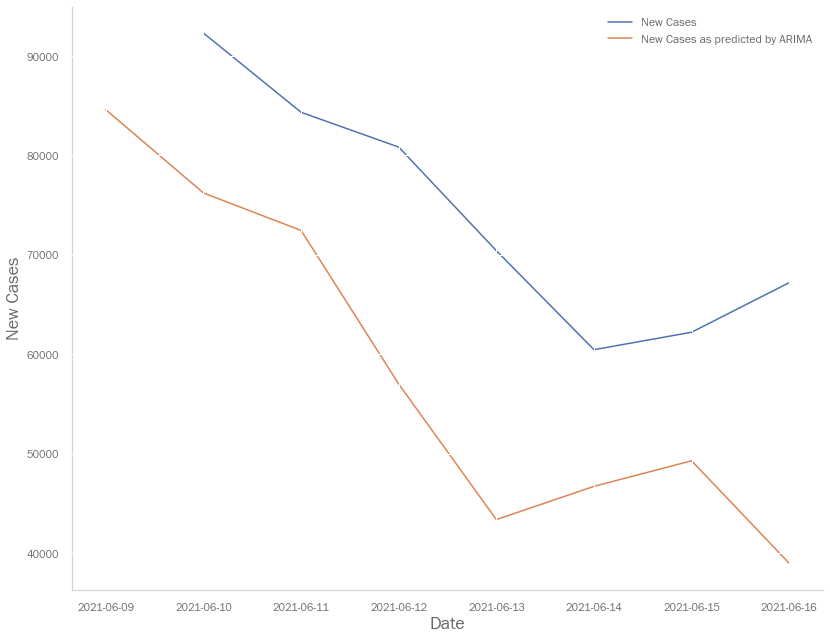

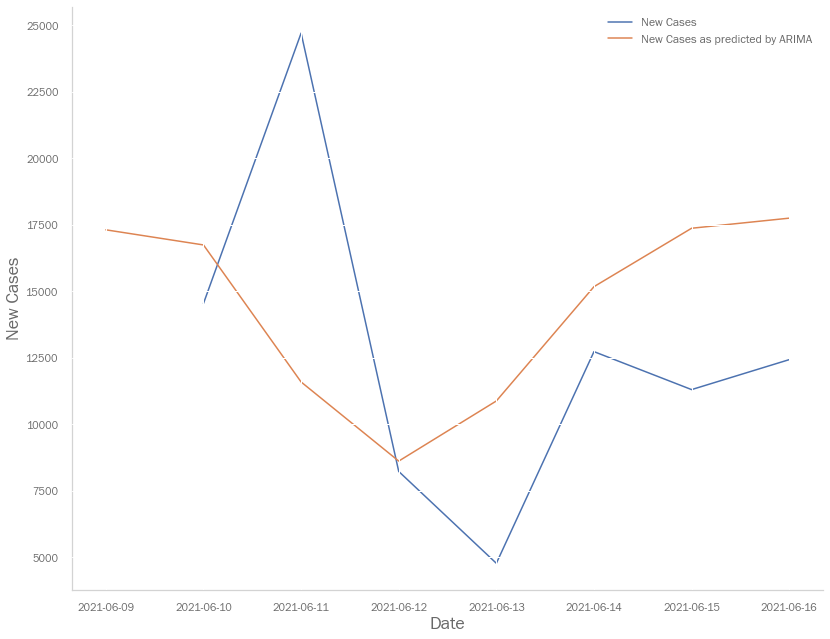

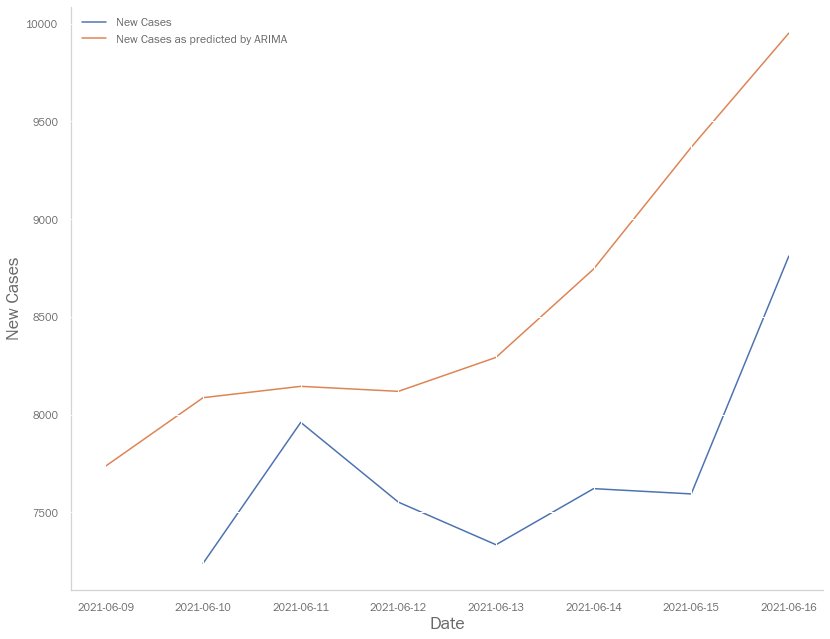

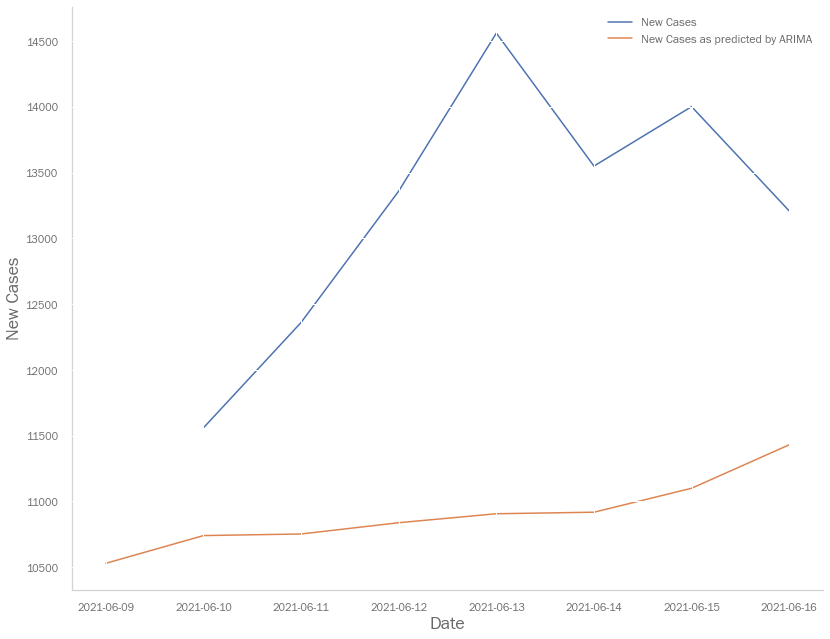

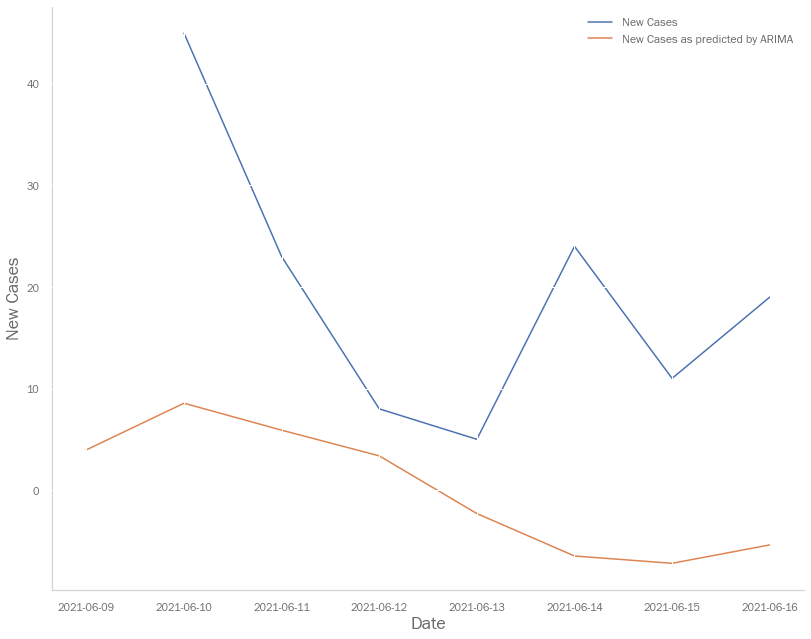

In [36]:
fig=plt.figure(figsize=(12,10))
plt.plot(data_ind_check['date'], data_ind_check['new_cases'])
plt.plot(dates, india_forecasts)
plt.legend(['New Cases','New Cases as predicted by ARIMA'], prop={'size': 12})
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.grid()
plt.show()
fig.savefig('E:\webapp\india_for_act/india_for_act.png', bbox_inches = "tight")

fig1=plt.figure(figsize=(12,10))
plt.plot(data_usa_check['date'], data_usa_check['new_cases'])
plt.plot(dates, usa_forecasts)
plt.legend(['New Cases','New Cases as predicted by ARIMA'], prop={'size': 12})
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.grid()
plt.show()
fig1.savefig('E:/webapp/usa_for_act/usa_for_act.png', bbox_inches = "tight")

fig2=plt.figure(figsize=(12,10))
plt.plot(data_uk_check['date'], data_uk_check['new_cases'])
plt.plot(dates, uk_forecasts)
plt.legend(['New Cases','New Cases as predicted by ARIMA'], prop={'size': 12})
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.grid()
plt.show()
fig2.savefig('E:/webapp/uk_for_act/uk_for_act.png', bbox_inches = "tight")

fig3=plt.figure(figsize=(12,10))
plt.plot(data_russia_check['date'], data_russia_check['new_cases'])
plt.plot(dates, russia_forecasts)
plt.legend(['New Cases','New Cases as predicted by ARIMA'], prop={'size': 12})
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.grid()
plt.show()
fig3.savefig('E:/webapp/russia_for_act/russia_for_act.png', bbox_inches = "tight")

fig4=plt.figure(figsize=(12,10))
plt.plot(data_israel_check['date'], data_israel_check['new_cases'])
plt.plot(dates, israel_forecasts)
plt.legend(['New Cases','New Cases as predicted by ARIMA'], prop={'size': 12})
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.grid()
plt.show()
fig4.savefig('E:/webapp/israel_for_act/israel_for_act.png', bbox_inches = "tight")

In [37]:
india_param = (5,2,5)
usa_param = (5,1,4)
uk_param = (5,2,3)
russia_param = (5,2,5)
israel_param = (5,2,2)

In [38]:
def evaluateModel(data, param):
    X = data['new_cases'].values
    size = int(len(X) * 0.66)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    # walk-forward validation
    for t in range(len(test)):
        model = ARIMA(history, order=param)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
    rmse = np.sqrt(mean_squared_error(test, predictions))
    return rmse

In [39]:
india_arima_rmse = evaluateModel(data_ind_arima, india_param) 
print(india_arima_rmse)

predicted=16492.604315, expected=20021.000000
predicted=14934.676373, expected=16432.000000
predicted=19010.838508, expected=20549.000000
predicted=20779.016614, expected=21822.000000
predicted=19574.600096, expected=0.000000
predicted=7858.455652, expected=20035.000000
predicted=13111.486038, expected=37256.000000
predicted=25653.906403, expected=16504.000000
predicted=16229.634081, expected=16375.000000
predicted=22752.054814, expected=18088.000000
predicted=16976.068132, expected=20346.000000
predicted=12862.196856, expected=18139.000000
C:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
predicted=27582.776299, expected=0.000000
predicted=16401.386964, expected=36867.000000
predicted=17046.640961, expected=16311.000000
predicted=13059.197887, expected=12584.000000
predicted=136

In [40]:
usa_arima_rmse = evaluateModel(data_usa_arima, usa_param)
print(usa_arima_rmse)

C:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
predicted=216713.963038, expected=97880.000000
predicted=113869.194960, expected=226416.000000
predicted=156702.345173, expected=155845.000000
predicted=152143.343051, expected=174152.000000
predicted=189878.088798, expected=200408.000000
predicted=203877.185703, expected=233701.000000
predicted=192746.565299, expected=235600.000000
predicted=211038.525832, expected=153916.000000
predicted=202900.784988, expected=300462.000000
predicted=205613.566965, expected=208853.000000
predicted=212679.840921, expected=184005.000000
predicted=232550.563458, expected=235042.000000
predicted=258524.117063, expected=255637.000000
predicted=214097.709451, expected=278337.000000
predicted=222958.396256, expected=295257.000000
pred

In [41]:
uk_arima_rmse = evaluateModel(data_uk_arima, uk_param)
print(uk_arima_rmse)

C:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
predicted=38222.399927, expected=32493.000000
predicted=35522.424434, expected=41460.000000
predicted=42630.598103, expected=53275.000000
predicted=50824.726662, expected=50239.000000
predicted=47721.686270, expected=56029.000000
predicted=53600.663592, expected=53458.000000
predicted=51223.282941, expected=57853.000000
predicted=58121.153158, expected=55157.000000
predicted=56843.037685, expected=58923.000000
predicted=62871.151939, expected=61087.000000
predicted=62980.264105, expected=62556.000000
predicted=65773.931637, expected=52787.000000
predicted=57257.895998, expected=68192.000000
predicted=68614.287902, expected=60098.000000
predicted=64296.737947, expected=55026.000000
predicted=61479.578270, expected=46275.000000
pred

In [42]:
russia_arima_rmse = evaluateModel(data_russia_arima, russia_param)
print(russia_arima_rmse)

predicted=29332.503833, expected=27849.000000
predicted=28063.315962, expected=27363.000000
predicted=26316.725450, expected=26588.000000
predicted=26636.924517, expected=26095.000000
predicted=27400.258862, expected=27329.000000
predicted=27610.477322, expected=26613.000000
predicted=26513.941017, expected=25938.000000
predicted=26032.701736, expected=23845.000000
predicted=23777.813122, expected=23015.000000
predicted=21937.397119, expected=23955.000000
predicted=23541.898507, expected=23902.000000
predicted=24638.747398, expected=23218.000000
predicted=23398.157001, expected=23330.000000
predicted=22562.536860, expected=23012.000000
predicted=21695.327845, expected=22540.000000
predicted=21968.010605, expected=23018.000000
predicted=22555.208846, expected=22657.000000
predicted=22550.994395, expected=22544.000000
predicted=22551.568356, expected=24303.000000
predicted=23871.080198, expected=24294.000000
predicted=23741.481232, expected=23670.000000
predicted=23215.268664, expected=2

In [43]:
israel_arima_rmse = evaluateModel(data_israel_arima, israel_param)
print(israel_arima_rmse)

C:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
predicted=6545.198794, expected=6631.000000
predicted=6785.690197, expected=7966.000000
predicted=7742.629872, expected=7309.000000
predicted=7087.374804, expected=7600.000000
predicted=7724.624774, expected=6309.000000
predicted=6509.829806, expected=8077.000000
predicted=8579.836154, expected=5885.000000
predicted=6225.395937, expected=9754.000000
predicted=9711.244291, expected=8990.000000
predicted=9147.537209, expected=9997.000000
predicted=9006.047316, 

In [44]:
rmse_for_arima = list()
rmse_for_arima.extend([india_arima_rmse, usa_arima_rmse,uk_arima_rmse, russia_arima_rmse, israel_arima_rmse])
print(rmse_for_arima)

[9518.033182512749, 20885.3998608438, 3134.8550483394406, 569.4505492993942, 1127.9895061465897]


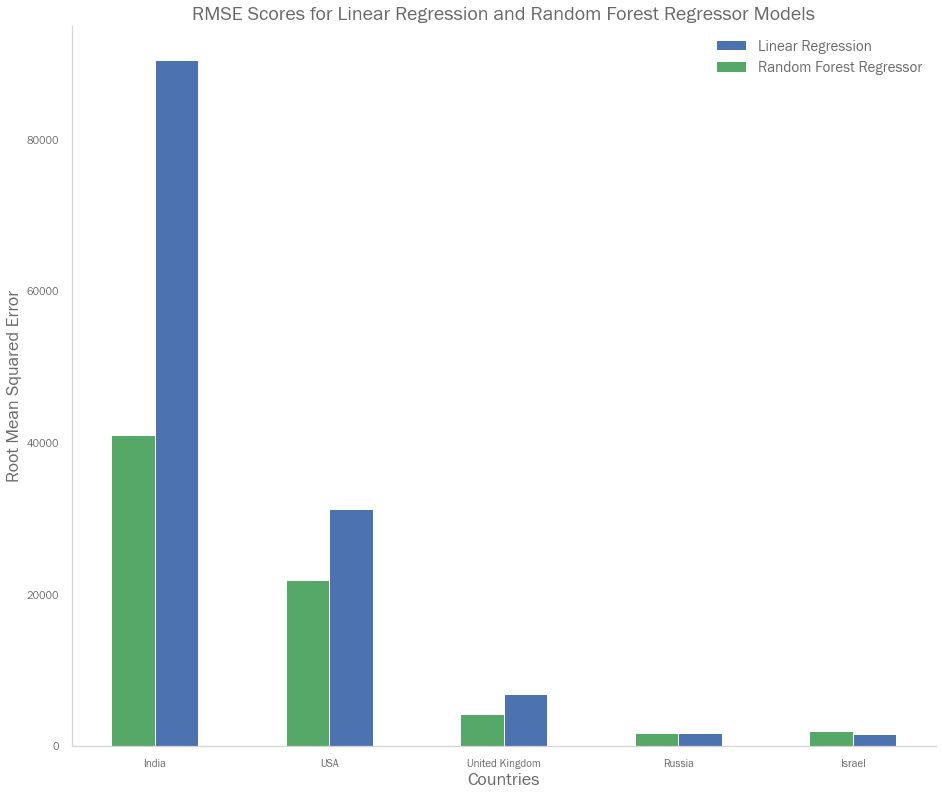

In [45]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(countries , rmse_for_lreg, color = 'b', width = 0.25, align='edge' )

ax.bar(countries , rmse_for_rfr, color = 'g', width = -0.25, align='edge')
plt.legend(['Linear Regression','Random Forest Regressor'], prop={'size': 15})
plt.xlabel('Countries')
plt.ylabel('Root Mean Squared Error')
plt.title("RMSE Scores for Linear Regression and Random Forest Regressor Models")
fig.savefig('E:/webapp/rmse_for_rfr/rmse_for_rfr.png', bbox_inches = "tight")

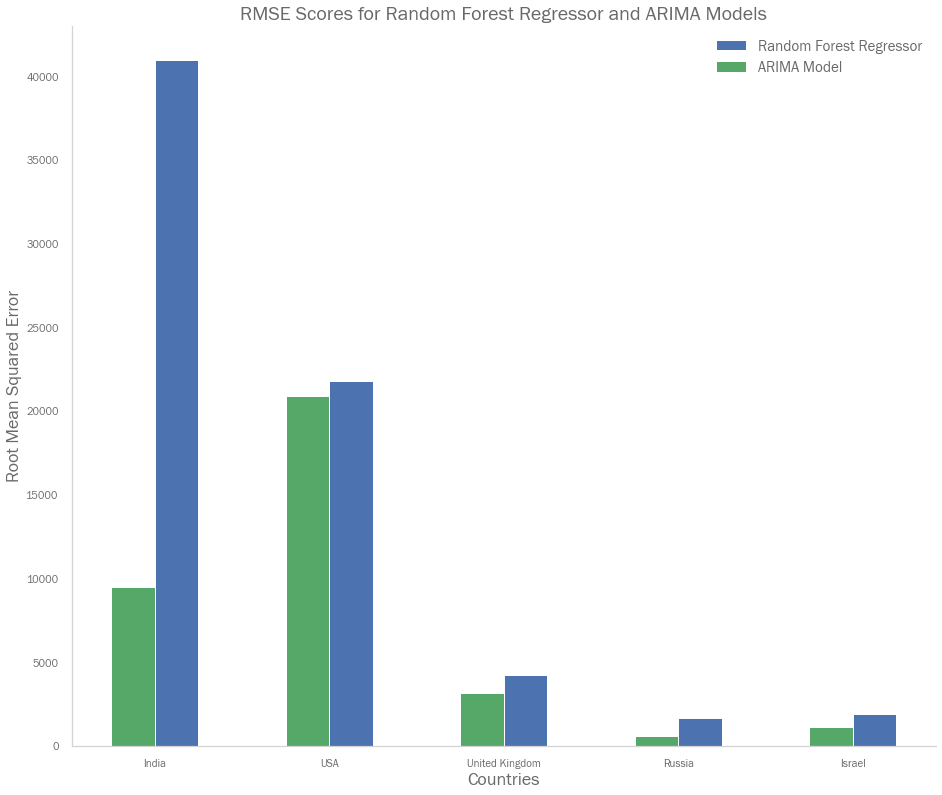

In [46]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(countries , rmse_for_rfr, color = 'b', width = 0.25, align='edge' )

ax.bar(countries , rmse_for_arima, color = 'g', width = -0.25, align='edge')
plt.legend(['Random Forest Regressor', 'ARIMA Model'], prop={'size': 15})
plt.xlabel('Countries')
plt.ylabel('Root Mean Squared Error')
plt.title("RMSE Scores for Random Forest Regressor and ARIMA Models")
fig.savefig('E:/webapp/rmse_lreg_rfr/rmse_lreg_rfr.png', bbox_inches = "tight")

In [47]:
india_arima = ARIMA(data_ind_arima['new_cases'], order = (5,2,5))
india_arima_fit = india_arima.fit()

In [48]:
usa_arima = ARIMA(data_usa_arima['new_cases'], order = (5,1,4))
usa_arima_fit = usa_arima.fit()

In [49]:
uk_arima = ARIMA(data_uk_arima['new_cases'], order = (5,2,3))
uk_arima_fit = uk_arima.fit()

C:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [50]:
russia_arima = ARIMA(data_russia_arima['new_cases'], order = (5,2,5))
russia_arima_fit = russia_arima.fit()

In [51]:
israel_arima = ARIMA(data_israel_arima['new_cases'], order = (5,2,2))
israel_arima_fit = israel_arima.fit()

C:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [52]:
india_forecasts = india_arima_fit.forecast(steps = 7)

usa_forecasts = usa_arima_fit.forecast(steps = 7)
uk_forecasts = uk_arima_fit.forecast(steps = 7)
russia_forecasts = russia_arima_fit.forecast(steps = 7)
israel_forecasts = israel_arima_fit.forecast(steps = 7)

In [53]:
dates = list()
for i in range(7):
    date = date.today()
    increment = timedelta(days = i)
    date = date + increment
    dates.append(date)
    
    
print(dates)

[datetime.date(2021, 6, 17), datetime.date(2021, 6, 18), datetime.date(2021, 6, 19), datetime.date(2021, 6, 20), datetime.date(2021, 6, 21), datetime.date(2021, 6, 22), datetime.date(2021, 6, 23)]


In [54]:
forecastdict = {'Date': dates, 'India': india_forecasts}
forecastdata = pd.DataFrame(forecastdict, columns = ['Date', 'India'])

print(forecastdata)

           Date         India
504  2021-06-17  61872.494073
505  2021-06-18  56681.043245
506  2021-06-19  53317.743993
507  2021-06-20  42402.512171
508  2021-06-21  32049.168978
509  2021-06-22  34402.187903
510  2021-06-23  38123.497115


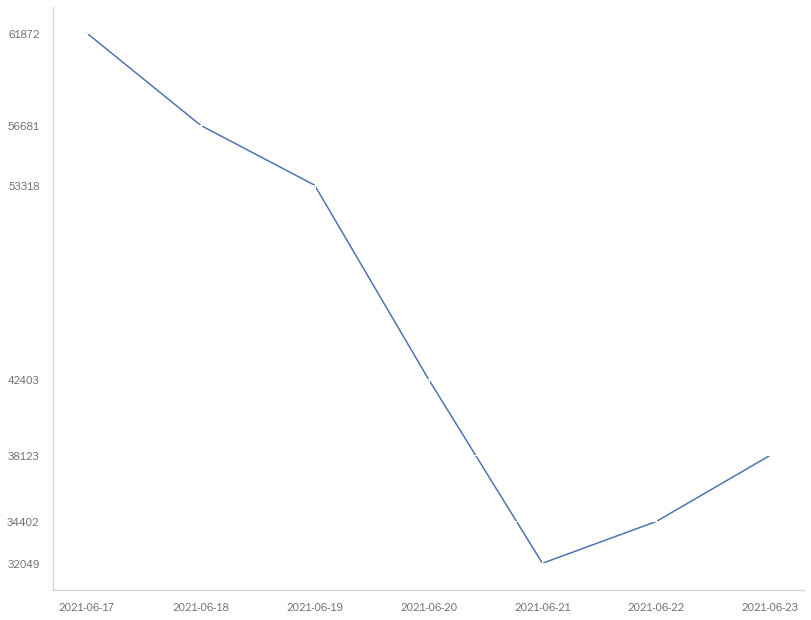

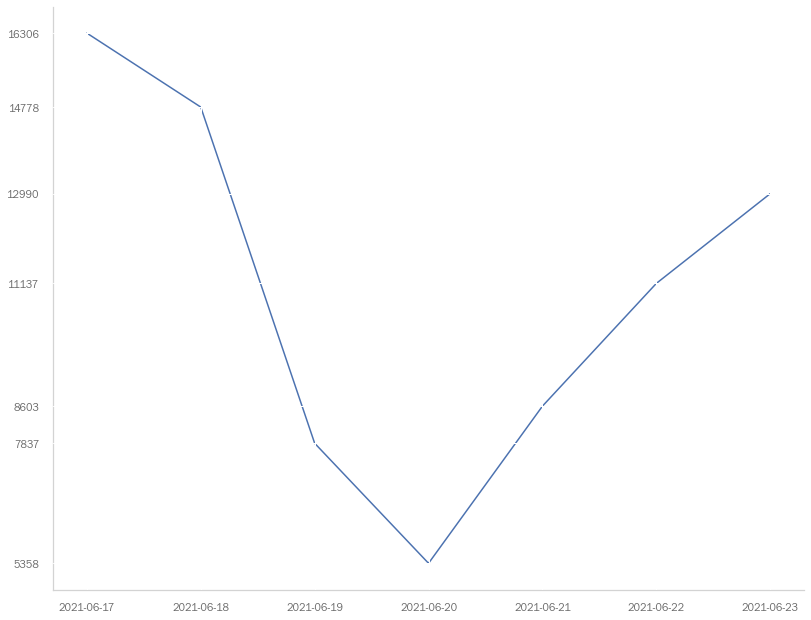

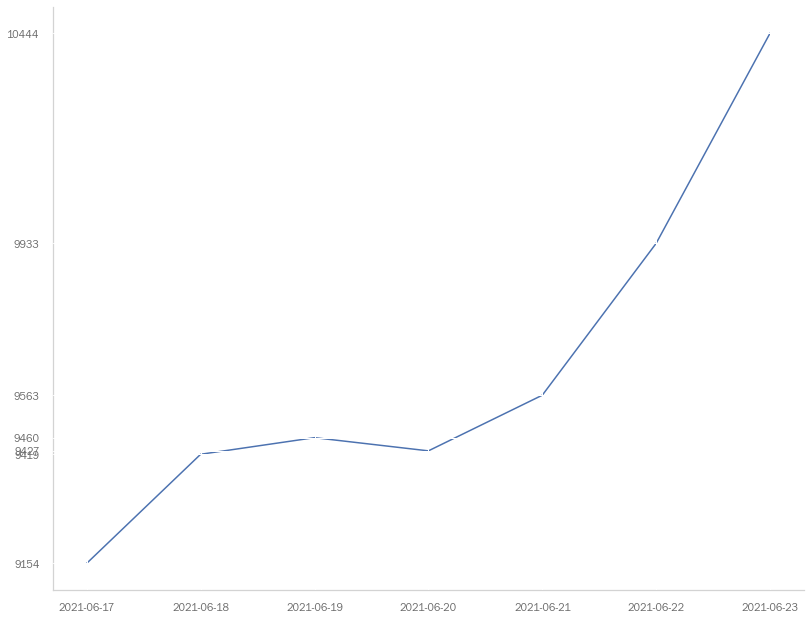

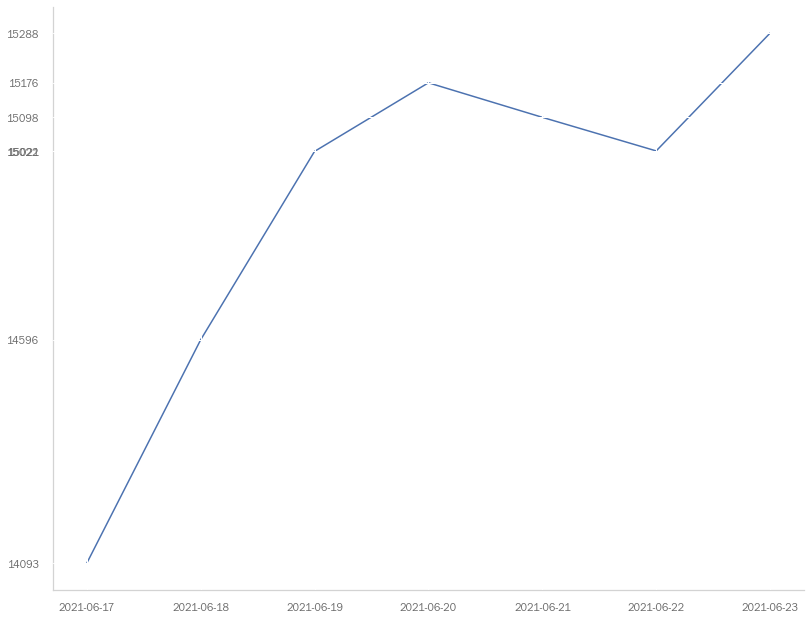

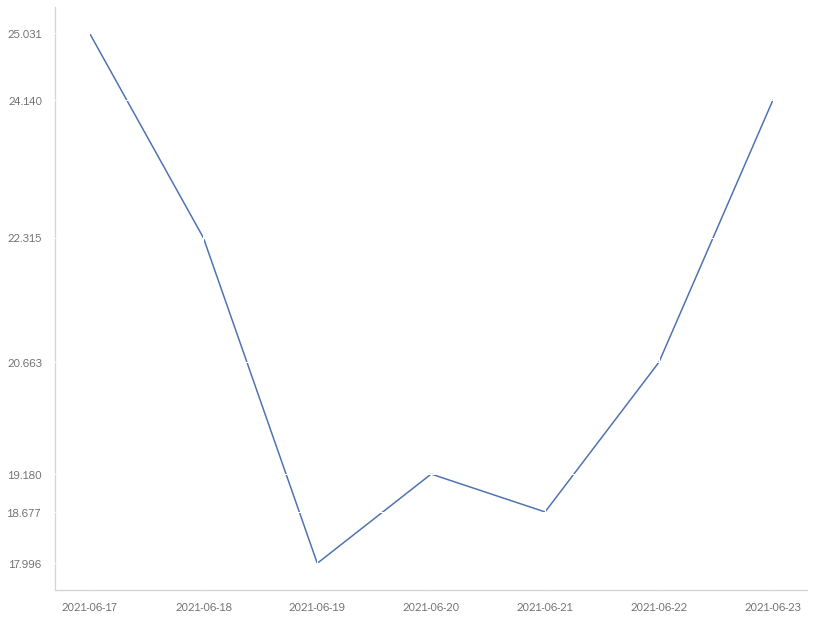

In [55]:
fig=plt.figure(figsize=(12,10))
plt.plot(dates, india_forecasts)
plt.grid()
plt.yticks(india_forecasts)
plt.show()
fig.savefig('E:/webapp/india_forecast/india_forecast.png', bbox_inches = "tight")

fig1=plt.figure(figsize=(12,10))
plt.plot(dates, usa_forecasts)
plt.grid()
plt.yticks(usa_forecasts)
plt.show()
fig1.savefig('E:/webapp/usa_forecast/usa_forecast.png', bbox_inches = "tight")

fig2=plt.figure(figsize=(12,10))
plt.plot(dates, uk_forecasts)
plt.grid()
plt.yticks(uk_forecasts)
plt.show()
fig2.savefig('E:/webapp/uk_forecast/uk_forecast.png', bbox_inches = "tight")

fig3=plt.figure(figsize=(12,10))
plt.plot(dates, russia_forecasts)
plt.grid()
plt.yticks(russia_forecasts)
plt.show()
fig3.savefig('E:/webapp/russia_forecast/russia_forecast.png', bbox_inches = "tight")

fig4=plt.figure(figsize=(12,10))
plt.plot(dates, israel_forecasts)
plt.grid()
plt.yticks(israel_forecasts)
plt.show()
fig4.savefig('E:/webapp/iran_forecast/iran_forecast.png', bbox_inches = "tight")